# Title: Amazon Stock (AMZN) Analysis

@author: JooMin Jennifer Kim

1) Problem Statement: How stable is the Amazon.com, Inc. (AMZN) stock based on the analysis of its historical stock data and as such, is its stock price predicted to increase throughout 2020?  

2) Proposition/Hypothesis: The stock price for Amazon.com, Inc. (AMZN) is expected to increase.
   I was interested in analyzing the stock data from Amazon as Amazon.com, Inc. is one of the few companies that experienced explosive growth during the COVID-19 pandemic. According to CNBC, Amazon  reported earnings for its second fiscal quarter of 2020, including revenue up 40% to USD 88.9 billion, net income of USD 5.2 billion, and earnings per share of USD 10.30 (compared to revenue of USD 63.4 billion, net income of USD 2.6 billion, and earnings per share of USD 5.22 in Q2 2019) (Source: https://www.cnbc.com/2020/07/30/amazon-amzn-earnings-q2-2020.html). I also compare Amazon's Closing price data over the last 120 days to other tech stocks that increased in the same period (Tesla, Netflix, and Zoom) as well as the S&P 500 since the S&P 500 is largely considered an essential benchmark index for the U.S. stock market (Source: https://www.investopedia.com/ask/answers/041315/what-are-pros-and-cons-using-sp-500-benchmark.asp). 

3) Data Source: Yahoo Finance (also available as .csv) 
   Amazon  - https://finance.yahoo.com/quote/AMZN/history/
   S&P 500 - https://finance.yahoo.com/quote/%5EGSPC/history/
   Netflix - https://finance.yahoo.com/quote/NFLX/history?p=NFLX
   Tesla - https://finance.yahoo.com/quote/TSLA/history?p=TSLA
   Zoom - https://finance.yahoo.com/quote/ZM/history?p=ZM
   
4) Reference Work - https://sajalsharma.com/portfolio/tech_stock_analysis

5) Difference of Work and Reference Work - I used the above source as a reference and a starting point. However, the biggest difference is that when I understood what the reference work was trying to accomplish, I wrote the code in a way that made the most sense to me and the way I learned. I also added in analysis of my own that I thought contributed insight to the conclusion. 

6) Summary of Work & Results - At the end

7) Other sources:
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.DataFrame.pct_change.html, https://seaborn.pydata.org/tutorial/regression.html, https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html, https://investmentu.com/bullish-vs-bearish/, https://www.sqlitetutorial.net/sqlite-window-functions/sqlite-rank/


In [103]:
# import libraries, packages, modules, sqlite3
import numpy as np
import sqlite3
import pandas as pd
from pandas import Series, DataFrame
from pandas_datareader import data
from datetime import datetime, timedelta
from __future__ import division

# visual  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline
from scipy.stats import norm
import scipy.stats as stats
from warnings import filterwarnings
# ignore warnings
filterwarnings('ignore')

In [104]:
# determine start and end time - start: three years ago, end: today
start = datetime.now() - timedelta(days=1097)
end = datetime.now()

# get data from Yahoo Finance and create dataframe
amzndf = data.DataReader(['AMZN'],'yahoo',start,end)
# amzndf.set_index(pd.to_datetime(amzndf.index),inplace=True)
amzndf

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
Date,,,,,,
2017-09-06,967.799988,967.799988,971.840027,960.599976,968.320007,2129900
2017-09-07,979.469971,979.469971,980.590027,972.549988,974.000000,2566800
2017-09-08,965.900024,965.900024,979.880005,963.469971,979.099976,2605300
2017-09-11,977.960022,977.960022,981.940002,974.219971,974.460022,2186700
2017-09-12,982.580017,982.580017,984.669983,975.520020,983.270020,2481100
...,...,...,...,...,...,...
2020-08-31,3450.959961,3450.959961,3495.000000,3405.000000,3408.989990,4185900
2020-09-01,3499.120117,3499.120117,3513.870117,3467.000000,3489.580078,3476400


In [105]:
# summary of AMZN stock
amzndf.describe()

Attributes,Adj Close,Close,High,Low,Open,Volume
Symbols,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN
count,756.000000,756.000000,756.000000,756.000000,756.000000,7.560000e+02
mean,1813.528928,1813.528928,1833.148069,1791.338929,1813.341430,4.677328e+06
std,488.694081,488.694081,496.245381,479.850441,488.456610,2.285479e+06
min,938.599976,938.599976,948.630005,931.750000,945.489990,8.813000e+05
25%,1586.247498,1586.247498,1596.902527,1570.949982,1586.337463,3.056550e+06
50%,1776.869995,1776.869995,1792.924988,1757.135010,1775.859985,4.076850e+06
75%,1912.812469,1912.812469,1936.002472,1899.822540,1919.382507,5.717100e+06
max,3531.449951,3531.449951,3552.250000,3486.689941,3547.000000,1.656500e+07


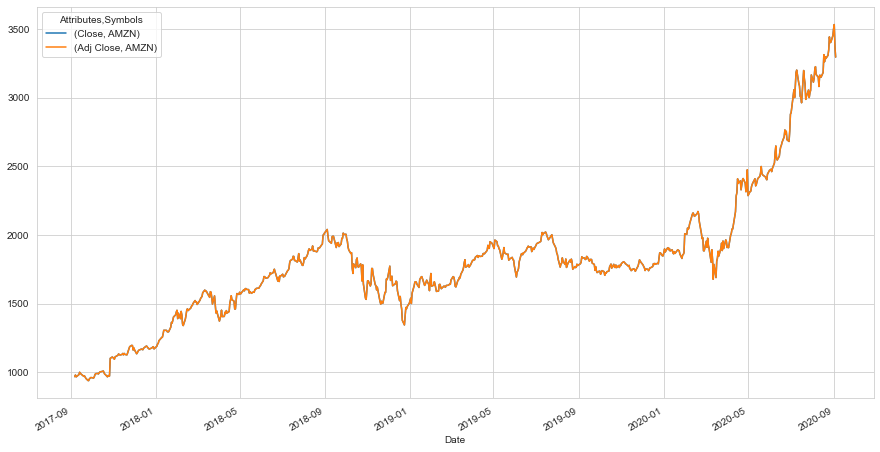

In [106]:
# visualization the Close & Adj Close price of AMZN stock over the past 3 years 
amzndf[['Close', 'Adj Close']].plot(legend=True,figsize=(15,8))

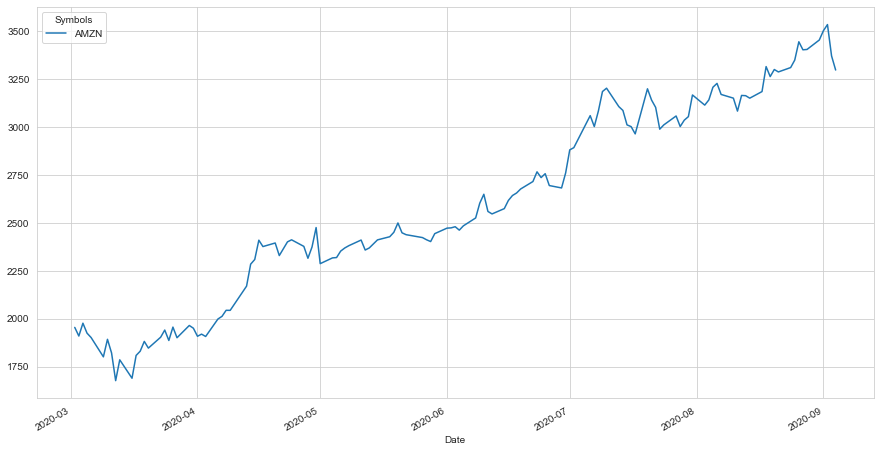

In [107]:
# remove data prior to 2020-03-01 to examine the potential impact of COVID-19 
amzndf.truncate(before='2020-03-01')['Close'].plot(figsize=(15,8))

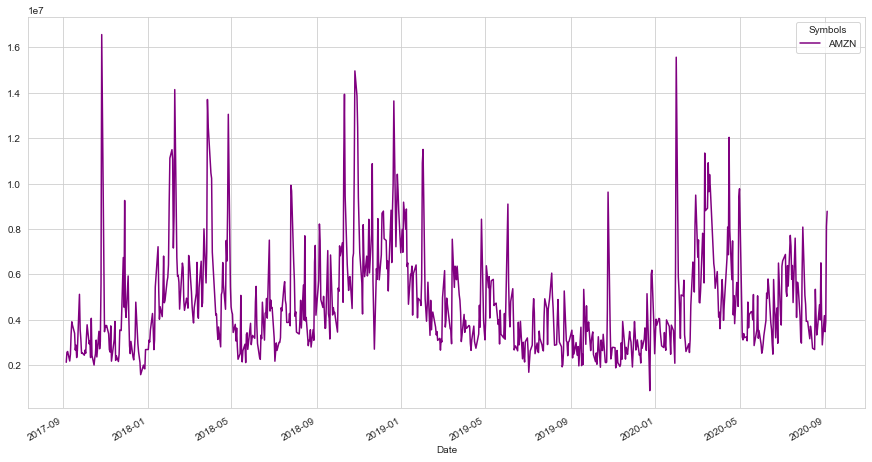

In [108]:
# visualization the total volume of the AMZN stock being traded over the past 3 years 
amzndf['Volume'].plot(legend=True,figsize=(15,8),color='purple')

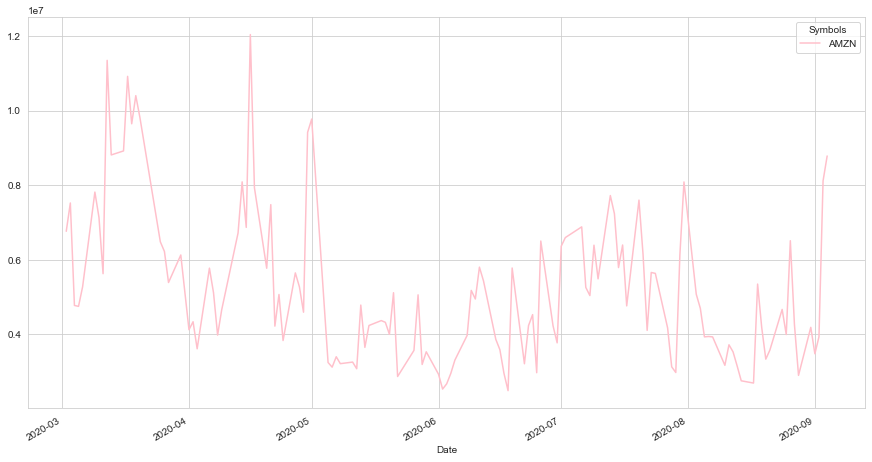

In [109]:
# remove data prior to 2020-03-01 to examine the potential impact of COVID-19 
amzndf.truncate(before='2020-03-01')['Volume'].plot(legend=True,figsize=(15,8),color='pink')

In [110]:
# determine start and end time - start: three years ago, end: today
start = datetime.now() - timedelta(days=1097)
end = datetime.now()

# get data and create dataframe for AMZN and ^GSPC (S&P 500)
# S&P 500 is a good index to use as benchmark 
df = data.DataReader(['AMZN', '^GSPC'],'yahoo',start,end)
df

Attributes    Adj Close                     Close                      High  \
Symbols            AMZN        ^GSPC         AMZN        ^GSPC         AMZN   
Date                                                                          
2017-09-06   967.799988  2465.540039   967.799988  2465.540039   971.840027   
2017-09-07   979.469971  2465.100098   979.469971  2465.100098   980.590027   
2017-09-08   965.900024  2461.429932   965.900024  2461.429932   979.880005   
2017-09-11   977.960022  2488.110107   977.960022  2488.110107   981.940002   
2017-09-12   982.580017  2496.479980   982.580017  2496.479980   984.669983   
...                 ...          ...          ...          ...          ...   
2020-08-31  3450.959961  3500.310059  3450.959961  3500.310059  3495.000000   
2020-09-01  3499.120117  3526.649902  3499.120117  3526.649902  3513.870117   
2020-09-02  3531.449951  3580.840088  3531.449951  3580.840088  3552.250000   
2020-09-03  3368.000000  3455.060059  3368.000000  3455.060059  3488.409912   
2020-09-04  3294.620117  3426.959961  3294.620117  3426.959961  3381.500000   

Attributes                       Low                      Open               \
Symbols           ^GSPC         AMZN        ^GSPC         AMZN        ^GSPC   
Date                                                                          
2017-09-06  2469.639893   960.599976  2459.199951   968.320007  2463.830078   
2017-09-07  2468.620117   972.549988  2460.290039   974.000000  2468.060059   
2017-09-08  2467.110107   963.469971  2459.399902   979.099976  2462.250000   
2017-09-11  2488.949951   974.219971  2474.520020   974.460022  2474.520020   
2017-09-12  2496.770020   975.520020  2490.370117   983.270020  2491.939941   
...                 ...          ...          ...          ...          ...   
2020-08-31  3514.770020  3405.000000  3493.250000  3408.989990  3509.729980   
2020-09-01  3528.030029  3467.000000  3494.600098  3489.580078  3507.439941   
2020-09-02  3588.110107  3486.689941  3535.229980  3547.000000  3543.760010   
2020-09-03  3564.850098  3303.000000  3427.409912  3485.000000  3564.739990   
2020-09-04  3479.149902  3111.129883  3349.629883  3318.000000  3453.600098   

Attributes   Volume              
Symbols        AMZN       ^GSPC  
Date                             
2017-09-06  2129900  3374410000  
2017-09-07  2566800  3353930000  
2017-09-08  2605300  3302490000  
2017-09-11  2186700  3291760000  
2017-09-12  2481100  3230920000  
...             ...         ...  
2020-08-31  4185900  4342290000  
2020-09-01  3476400  4083110000  
2020-09-02  3931500  4285190000  
2020-09-03  8114400  4898680000  
2020-09-04  8781754  3044871716  

[756 rows x 12 columns]

In [111]:
# calculate highest and lowest (max and min) Close price for AMZN and ^GSPC (S&P 500) over the past 3 years
threeyears  = datetime.today() - timedelta(days=1097)
past120days = datetime.today() - timedelta(days=120)
amzn3yr     = df['Close']['AMZN'].loc[threeyears:end]
gspc3yr     = df['Close']['^GSPC'].loc[threeyears:end]
amzn120days = df['Close']['AMZN'].loc[past120days:end]
gspc120days = df['Close']['^GSPC'].loc[past120days:end]

In [112]:
amzn3yr.max(), amzn3yr.min(), amzn3yr.mean(), gspc3yr.max(), gspc3yr.min(), gspc3yr.mean()

(3531.449951171875,
 938.5999755859375,
 1814.6490992666081,
 3580.840087890625,
 2237.39990234375,
 2860.7576679558156)

For AMZN Close price, max is USD 3225.0, min is USD 938.6, and mean is USD 1761.3 over the past 3 years.
For S&P 500 (^GSPC) Close price, max is USD 3386.1, min is USD 2237.4, and mean is USD 2838.5 over the past 3 years.

In [113]:
# create dataframe comparing the max, min, and mean of AMZN stock and ^GSPC (S&P 500) stock over the past 3 years
maxminmean3yr = data.DataReader(['AMZN','^GSPC'],'yahoo',start,end)['Close'].apply(['max', 'min', 'mean'])
maxminmean3yr

,AMZN,^GSPC
max,3531.449951,3580.840088
min,938.599976,2237.399902
mean,1813.528928,2860.234893


In [114]:
# create dataframe comparing the max, min, and mean of AMZN stock and ^GSPC (S&P 500) stock over the past 120 days 
maxminmean120days = data.DataReader(['AMZN','^GSPC'],'yahoo',start,end).truncate(before='2020-03-01')['Close'].apply(['max', 'min', 'mean'])
maxminmean120days

,AMZN,^GSPC
max,3531.449951,3580.840088
min,1676.609985,2237.399902
mean,2594.603259,3021.453715


For AMZN Close price, max is USD 3225.0, min is USD 1676.6, and mean is USD 2496.7 over the past 120 days.
For S&P 500 (^GSPC) Close price, max is USD 3380.4, min is USD 2237.4, and mean is USD 2966.4 over the past 120 days.
The increase in the minimum and mean Close price of the AMZN stock indicates the steep growth of the Amazon stock over the past 120 days. 

In [115]:
# similar to above, create dataframe comparing the max, min, and mean of AMZN stock and the ^GSPC (S&P 500) stock from 2020-03-01 
maxminmean_march = data.DataReader(['AMZN','^GSPC'],'yahoo',start,end)['Close'].tail(120).apply(['max', 'min', 'mean'])
maxminmean_march

,AMZN,^GSPC
max,3531.449951,3580.840088
min,1830.000000,2237.399902
mean,2669.598753,3042.789254


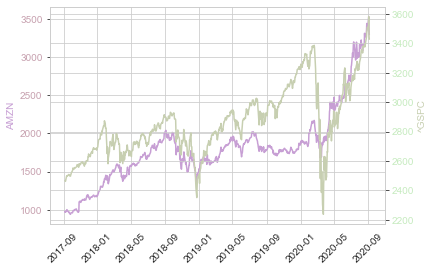

In [116]:
# visualization of comparing the Close Price of AMZN and ^GSPC (S&P 500)
fig, amznx = plt.subplots()

amznx.plot(df['Close']['AMZN'].index,df['Close']['AMZN'],color='#C79FD4')
amznx.set_ylabel('AMZN',color='#C79FD4')
for label in amznx.get_yticklabels():
    label.set_color('#C7A1AF')

gspcx = amznx.twinx()
gspcx.plot(df['Close']['^GSPC'].index,df['Close']['^GSPC'],color='#C7CFB1')
gspcx.set_ylabel('^GSPC',color='#C7CFB1')
for label in gspcx.get_yticklabels():
    label.set_color('#C7EBC0')
    
plt.setp(amznx.xaxis.get_majorticklabels(), rotation=45);

In [117]:
# create dataframe for Open price and Close price of AMZN to calculate number of days when Close price was higher than Open price
# I analyzed this because a stock's valuation between Close (from the day before) price and Open price and from the new Open price to Close price
# is affected by factors such as pandemics (ex. COVID-19), geopolitical events, announcements from large, multi-national companies,
# macroeconomic stats such as unemployment rates, etc. announced in foreign countries.

start = datetime.now() - timedelta(days=150)
end = datetime.now()
openclose_df = data.DataReader(['AMZN'],'yahoo',start,end)[['Open','Close']]

# calculate number of days when Close price was higher than Open price  
openclose_df['Close > Open'] = np.where(openclose_df['Close']>openclose_df['Open'],'Yes','No')
openclose_df

Attributes,Open,Close,Close > Open
Symbols,AMZN,AMZN,
Date,,,
2020-04-13,2040.000000,2168.870117,Yes
2020-04-14,2200.469971,2283.320068,Yes
2020-04-15,2257.679932,2307.679932,Yes
2020-04-16,2346.000000,2408.189941,Yes
2020-04-17,2372.330078,2375.000000,Yes
...,...,...,...
2020-08-31,3408.989990,3450.959961,Yes
2020-09-01,3489.580078,3499.120117,Yes


In [118]:
# designate 'Yes' = 1, 'No' = 0
openclose_df['Close > Open']=np.where(openclose_df['Close']>openclose_df['Open'],1,0)

# calculate the percentage of days when the Close price was greater than Open price
openclose_df['Close > Open'].sum()/openclose_df['Close > Open'].count()*100

53.398058252427184

The percentage of days when the Close price was greater than Open price is 53.33%. 

In [119]:
# determine start and end time - start: three years ago, end: today
start = datetime.now() - timedelta(days=1097)
end = datetime.now()

# get data and create dataframe for AMZN 
amzndf2 = data.DataReader(['AMZN'],'yahoo',start,end)

# calculate the percentage change of the Close price using pct_change(), which indicates the stock's daily return 
amzndf2['Close'].pct_change()

Symbols,AMZN
Date,
2017-09-06,NaN
2017-09-07,0.012058
2017-09-08,-0.013854
2017-09-11,0.012486
2017-09-12,0.004724
...,...
2020-08-31,0.014451
2020-09-01,0.013956
2020-09-02,0.009239


In [120]:
# add 'Percent Change' column to amzndf2 dataframe
amzndf2['Percent Change'] = amzndf2['Close'].pct_change(fill_method='ffill')
amzndf2

Attributes,Adj Close,Close,High,Low,Open,Volume,Percent Change
Symbols,AMZN,AMZN,AMZN,AMZN,AMZN,AMZN,
Date,,,,,,,
2017-09-06,967.799988,967.799988,971.840027,960.599976,968.320007,2129900,NaN
2017-09-07,979.469971,979.469971,980.590027,972.549988,974.000000,2566800,0.012058
2017-09-08,965.900024,965.900024,979.880005,963.469971,979.099976,2605300,-0.013854
2017-09-11,977.960022,977.960022,981.940002,974.219971,974.460022,2186700,0.012486
2017-09-12,982.580017,982.580017,984.669983,975.520020,983.270020,2481100,0.004724
...,...,...,...,...,...,...,...
2020-08-31,3450.959961,3450.959961,3495.000000,3405.000000,3408.989990,4185900,0.014451
2020-09-01,3499.120117,3499.120117,3513.870117,3467.000000,3489.580078,3476400,0.013956


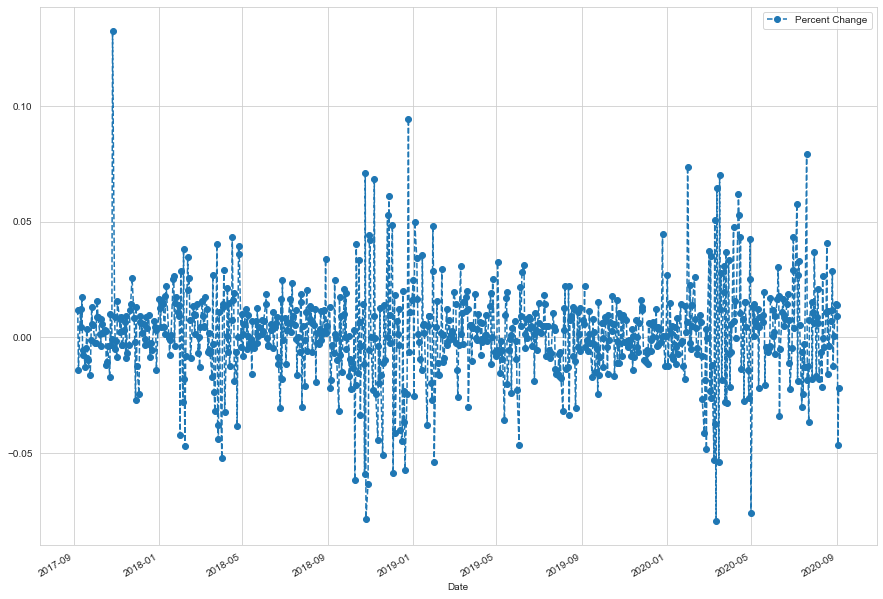

In [121]:
# visualization of Percent Change of the AMZN stock over the past three years 
amzndf2['Percent Change'].plot(figsize=(15,11),legend=True,linestyle='--',marker='o')

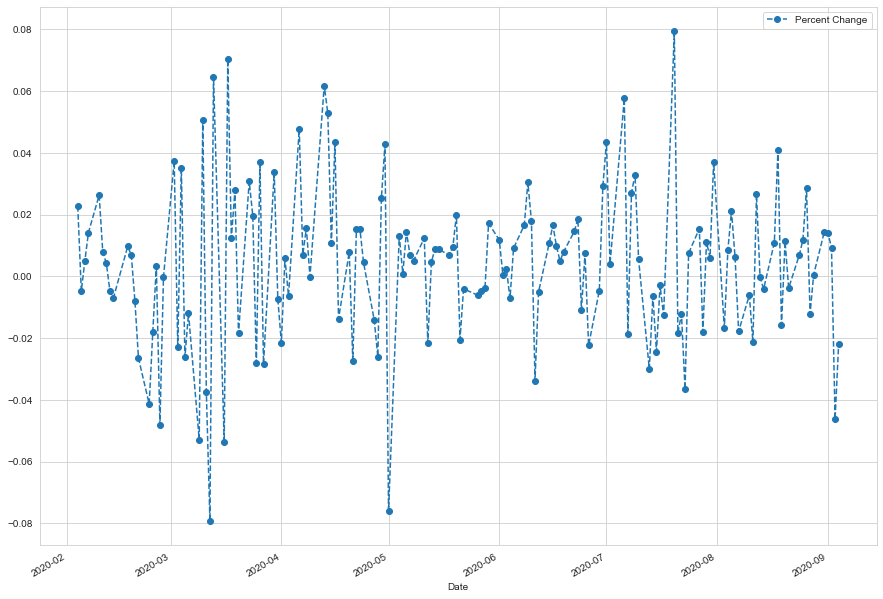

In [122]:
# visualization of Percent Change of the AMZN stock over the past 150 days 
amzndf2['Percent Change'].tail(150).plot(figsize=(15,11),legend=True,linestyle='--',marker='o')

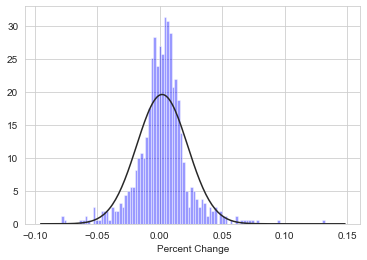

In [123]:
# histogram visualization for mean of the Percent Change of the AMZN stock 
sns.distplot(amzndf2['Percent Change'].dropna(),bins=100,fit=norm,kde=False,color='blue')

The result shows that positive daily returns seem to be slightly more frequent than negative returns.

In [124]:
# calculate the monthly percentage change of the Close price using pct_change() 
amzndf2['Close'].asfreq('BM').pct_change()

# Source: https://kanoki.org/2019/09/29/how-to-find-percentage-change-in-pandas/

Symbols,AMZN
Date,
2017-09-29,NaN
2017-10-31,0.149717
2017-11-30,0.064662
2017-12-29,-0.006187
2018-01-31,0.240639
2018-02-28,0.042429
2018-03-30,0.000000
2018-04-30,0.035492
2018-05-31,0.040539


In [125]:
# calculate the mean of the percentage change of the Close price using pct_change()
amzndf2['Close'].pct_change().mean()

Symbols
AMZN    0.001831
dtype: float64

In [126]:
# create dataframe for the Close price of AMZN in the past 120 days (approximately since April 2020)
maxminmeanamzn = data.DataReader(['AMZN'],'yahoo',start,end)['Close'].apply(['max', 'min', 'mean'])
past120days    = data.DataReader(['AMZN'],'yahoo',start,end).tail(120)['Close'].apply(['max', 'min', 'mean'])
past120days

,AMZN
max,3531.449951
min,1830.000000
mean,2669.598753


In [127]:
# calculate the percentage increase of the mean AMZN stock Close price over 3 years to that of over 120 days
compareamzn = pd.concat([maxminmeanamzn.rename(columns={'AMZN':'Close Price over 3 Years'}), past120days.rename(columns={'AMZN':'Close Price over 120 Days'})], axis=1, join='inner')
compareamzn['Difference in Close Price'] = compareamzn['Close Price over 120 Days'] - compareamzn['Close Price over 3 Years']
compareamzn['Percentage Increase'] = (compareamzn['Difference in Close Price']/compareamzn['Close Price over 3 Years'])*100
compareamzn

,Close Price over 3 Years,Close Price over 120 Days,Difference in Close Price,Percentage Increase
max,3531.449951,3531.449951,0.000000,0.000000
min,938.599976,1830.000000,891.400024,94.971239
mean,1813.528928,2669.598753,856.069824,47.204641


When you compare the Close Price over 3 Years vs. 120 Days, the difference in mean is USD 717.2, which is a staggering 40.6% increase. The difference in min is USD 738.0, which is a 78.6% increase.

In [128]:
# create dataframe to compare the Close Price of AMZN stock over 3 years to that of over 120 days
compareamzn1 = pd.concat([maxminmeanamzn.rename(columns={'AMZN':'Close Price over 3 Years'}), past120days.rename(columns={'AMZN':'Close Price over 120 Days'})], axis=1, join='inner')
compareamzn1.pct_change(axis='columns')

,Close Price over 3 Years,Close Price over 120 Days
max,NaN,0.000000
min,NaN,0.949712
mean,NaN,0.472046


Same as above, when you compare the Close Price over 3 Years vs. 120 Days, the difference in mean is USD 717.2, which is a staggering 40.6% increase The difference in min is 738.0, which is a 78.6% increase.

In [129]:
# create dataframe for Close Price of Amazon (AMZN), Netflix (NFLX), Tesla (TSLA), and Zoom (ZM)
closing_df = data.DataReader(['AMZN','NFLX', 'TSLA', 'ZM'],'yahoo',start,end).tail(100)['Close']
closing_df

Symbols,AMZN,NFLX,TSLA,ZM
Date,,,,
2020-04-16,2408.189941,439.170013,149.042007,150.259995
2020-04-17,2375.000000,422.959991,150.778000,150.059998
2020-04-20,2393.610107,437.489990,149.272003,148.990005
2020-04-21,2328.120117,433.829987,137.343994,143.270004
2020-04-22,2363.489990,421.420013,146.421997,150.250000
...,...,...,...,...
2020-08-31,3450.959961,529.559998,498.320007,325.100006
2020-09-01,3499.120117,556.549988,475.049988,457.690002
2020-09-02,3531.449951,552.840027,447.369995,423.559998


In [130]:
# create dataframe for the percent change (daily return) of all stocks from above
percentchange = closing_df.pct_change()
percentchange

Symbols,AMZN,NFLX,TSLA,ZM
Date,,,,
2020-04-16,NaN,NaN,NaN,NaN
2020-04-17,-0.013782,-0.036911,0.011648,-0.001331
2020-04-20,0.007836,0.034353,-0.009988,-0.007130
2020-04-21,-0.027360,-0.008366,-0.079908,-0.038392
2020-04-22,0.015192,-0.028606,0.066097,0.048719
...,...,...,...,...
2020-08-31,0.014451,0.010823,0.125689,0.086310
2020-09-01,0.013956,0.050967,-0.046697,0.407844
2020-09-02,0.009239,-0.006666,-0.058268,-0.074570


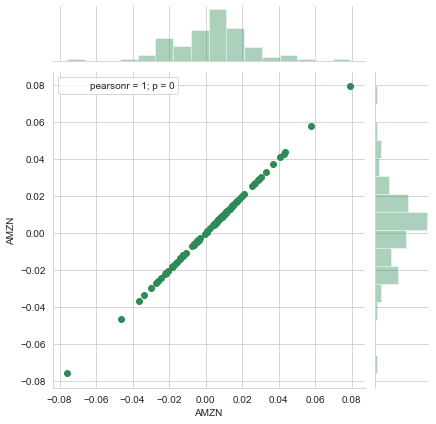

In [131]:
# visualization to compare AMZN stock to itself, which clearly shows a direct linear relationship 
sns.jointplot('AMZN','AMZN',percentchange,kind='scatter',color='seagreen',stat_func=stats.pearsonr)

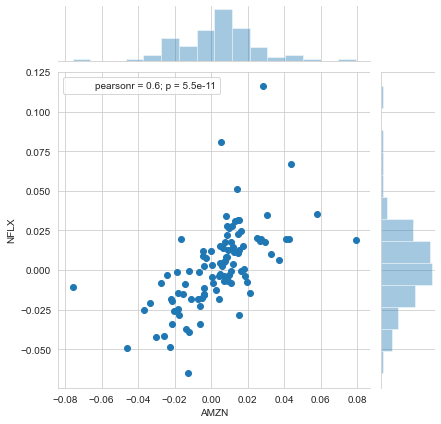

In [132]:
# visualization to compare the percent change (daily return) of AMZN stock to the NFLX stock
# this visualizastion will show whether or not two stocks are positively correlated with each other
# if this is the case, a linear relationship is expected
# I also added the Pearson r value using scipy.stats to examine the degree of correlation
sns.jointplot('AMZN','NFLX',percentchange,kind='scatter',stat_func=stats.pearsonr)

The result indicates that there is a moderate correlation between the AMZN stock and the NFLX stock.
The Pearson R Correlation Coefficient value of 0.67 corroborates this observation. 

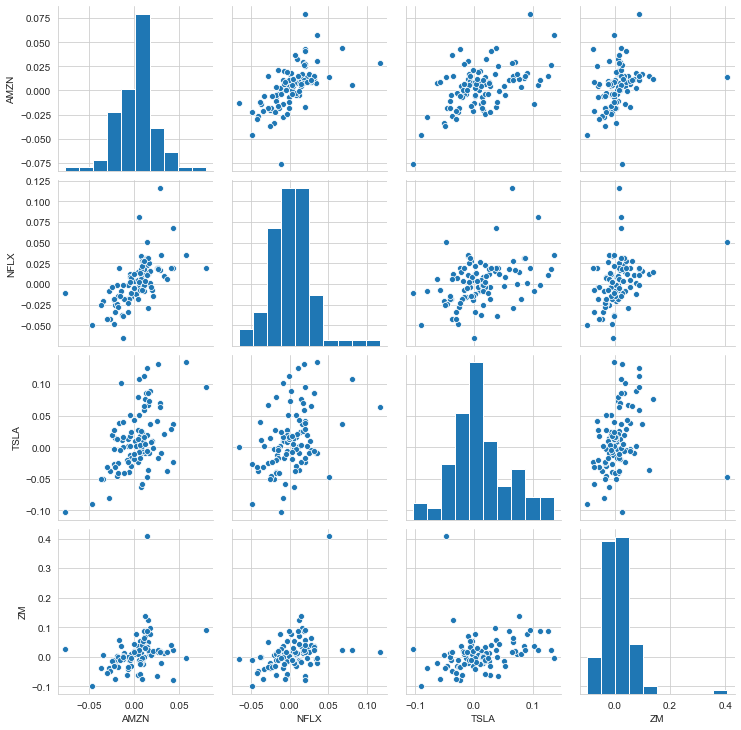

In [133]:
# visualization to compare the percent change (daily return) of AMZN stock to the NFLX, TSLA, and ZM stocks 
# this shows each and every possible combination of the four mentioned stocks 
sns.pairplot(percentchange.dropna())

According to this visualization, the AMZN stock (Amazon) and Netflix stock (NFLX) seem to have the strongest correlation between their the daily returns with while others have varying degrees of minor correlation. 
It is especially interesting to notice the correlation to the ZM stock as it is relatively new compared to the others. 

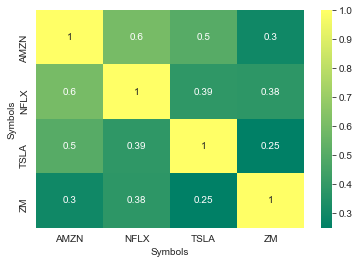

In [134]:
# visualization (heatmap) to compare the actual numbers for the correlation coefficients
sns.heatmap(percentchange.corr(), annot=True, cmap='summer')

As observed in the plot above, this heatmap shows yet again - both numerically and visually - that AMZN stock (Amazon) and Netflix  stock (NFLX) have the strongest correlation of daily stock return.
It's also interesting to see that all the technology companies are positively correlated.

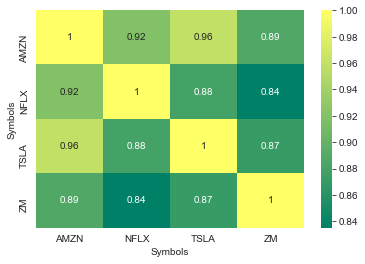

In [135]:
# visualization (heatmap) to compare the actual numbers for the correlation coefficients of the Close price 
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

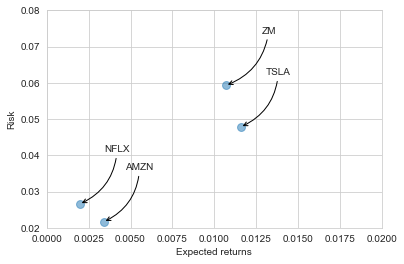

In [136]:
# calculate the risk of investing in the AMZN stock 
# one of the basic ways of quanitfying risk is to compare the expected return (mean of the stock’s daily returns, the percent change calculated above)
# with the standard deviation of the daily returns 

returnsdf = closing_df.pct_change()

# dropna() used to drop missing values/ignore NaN
returns = returnsdf.dropna()
area = np.pi*20
plt.scatter(returns.mean(),returns.std(),alpha=0.5,s=area)
# plt.scatter(returns.mean(),returns.std(),s=25)


plt.ylim([0.02,0.08])
plt.xlim([0,0.02])
plt.xlabel('Expected returns')
plt.ylabel('Risk')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy=(x,y),xytext=(50, 50),
        textcoords='offset points',ha='right',va ='bottom',
        arrowprops=dict(arrowstyle='->',connectionstyle='arc3,rad=-0.3',color='black'))

It is ideal to have a high expected return and a low risk. The plot above shows that in general, the less the expected return, the less risk involved such as in the cases of Amazon and Netflix. TSLA stock (Tesla) has a higher expected returns, but also has a higher risk.

In [137]:
# calculate the value at risk, which is the amount of money expected to lose per given confidence interval
# the ‘Bootstrap’ method and the ‘Monte Carlo Method’ from the Reference source are used 
returns['AMZN'].quantile(0.05)

-0.027624307454325547

According to the Reference source, 0.05 empirical quantile of daily returns is at -0.019. This means that with 95% confidence, the worst daily loss will not be greater than 2.75% of the initial investment.

In [138]:
# according to the Reference source, the 'Monte Carlo' method (I also learned this in another class) runs simulations to predict the future many times
# afterwards, the aggregation of all these simulations is used to establish a value for how risky the stock is

# set days (time horizon)
days = 365

# set delta
dt = 1/days

# calculate mu (drift) from the expected return data of AMZN 
mu = returns.mean()['AMZN']

# calculate volatility of the AMZN stock from the standard deviation of average return
sigma = returns.std()['AMZN']

# create dataframe for the Open price of AMZN stock to be used in calculation below 
amzndf['Open']

Symbols,AMZN
Date,
2017-09-06,968.320007
2017-09-07,974.000000
2017-09-08,979.099976
2017-09-11,974.460022
2017-09-12,983.270020
...,...
2020-08-31,3408.989990
2020-09-01,3489.580078
2020-09-02,3547.000000


In [139]:
# stock_monte_carlo function has parameters of number of days to run, mean, and standard deviation values
def stock_monte_carlo(start_price,days,mu,sigma):

    price = np.zeros(days)
    price[0] = start_price
    
    # set shock and drift 
    shock = np.zeros(days)
    drift = np.zeros(days)
    
    # calculate price array for given number of days
    for x in range(1,days):
        # shock formula taken from the Monte Carlo formula
        shock[x] = np.random.normal(loc=mu * dt,scale=sigma * np.sqrt(dt))
        # drift formula taken from the Monte Carlo formula
        drift[x] = mu * dt
        # new price = old price + old price* (shock+drift)
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    return price

Text(0.5, 1.0, 'Monte Carlo Analysis for AMZN')

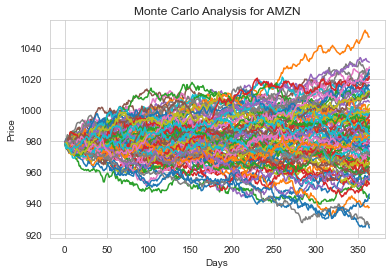

In [140]:
# run 100 simulations of the AMZN stock 
# Open price 
start_price = 978.40
simulations = np.zeros(100)

# visualization of the 100 simulations 
for run in range(100):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]
    plt.plot(stock_monte_carlo(start_price,days,mu,sigma))
    
plt.xlabel("Days")
plt.ylabel("Price")  
plt.title('Monte Carlo Analysis for AMZN')

Text(0.5, 1.0, 'Price distribution for AMZN Stock after 365 days')

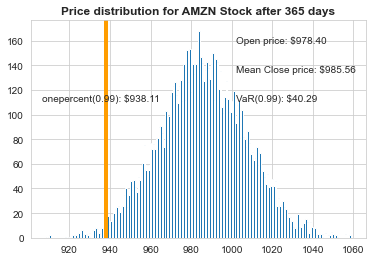

In [141]:
# start_price = 978.40

# increase number of runs to 10000
runs = 10000

# create matrix for the final price 
simulations = np.zeros(runs)

for run in range(runs):
    simulations[run] = stock_monte_carlo(start_price,days,mu,sigma)[days-1]

# onepercent is the 1% empirical quantile,  meaning that 99% of the values should fall between here
onepercent = np.percentile(simulations,1)

# visualization of the distribution of the end prices
plt.hist(simulations,bins=200)

# Open price
plt.figtext(0.6,0.8,s="Open price: $%.2f" %start_price)
# mean Close price
plt.figtext(0.6,0.7,"Mean Close price: $%.2f" % simulations.mean())
# variance of the price (within 99% confidence interval)
plt.figtext(0.6,0.6,"VaR(0.99): $%.2f" % (start_price-onepercent,))
#  1% quantile
plt.figtext(0.15,0.6, "onepercent(0.99): $%.2f" % onepercent)
# plot a line at the 1% quantile result
plt.axvline(x=onepercent, linewidth=4, color='#FF9D00')
# add title 
plt.title("Price distribution for AMZN Stock after 365 days", weight='bold')

The result shows that the Amazon stock is relatively stable. The starting price that we had was USD 978.40, and the average final price over 10000 runs was USD 989.27.

The orange line indicates the value of the AMZN stock at risk (admist its desired confidence interval). This means that for every AMZN stock, the risk is USD 41.87, 99% of the time. Based on this analysis, the AMZN stock price is expected to increase throughout 2020. 

# SQL: Calculate max, min, and avg of Close price

In [142]:
amazon_data = pd.read_csv('/Users/jenn/Downloads/AMZN.csv')
conn=sqlite3.connect('/Users/jenn/testDB.db', timeout=10)
cur=conn.cursor()

In [143]:
# amzndata = datasql1
amazon_data.to_sql('amzndata', conn, if_exists='replace', index = False)

In [144]:
cur.execute("select * from amzndata;")
results=cur.fetchall()
results 
type(results)

list

In [145]:
cur.execute("select * from amzndata;")
dfRes=pd.DataFrame(cur.fetchall(),columns=['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'])
dfRes

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-09-06,1838.219971,1840.650024,1826.400024,1833.510010,1833.510010,2496900
1,2019-09-09,1841.000000,1850.000000,1824.609985,1831.349976,1831.349976,2999500
2,2019-09-10,1822.750000,1825.810059,1805.339966,1820.550049,1820.550049,2613900
3,2019-09-11,1812.140015,1833.420044,1809.079956,1822.989990,1822.989990,2432800
4,2019-09-12,1837.630005,1853.660034,1834.280029,1843.550049,1843.550049,2823500
...,...,...,...,...,...,...,...
248,2020-08-31,3408.989990,3495.000000,3405.000000,3450.959961,3450.959961,4185900
249,2020-09-01,3489.580078,3513.870117,3467.000000,3499.120117,3499.120117,3476400
250,2020-09-02,3547.000000,3552.250000,3486.689941,3531.449951,3531.449951,3931500
251,2020-09-03,3485.000000,3488.409912,3303.000000,3368.000000,3368.000000,8114400


In [146]:
# SQL method of calculating MAX, MIN, and AVG (mean) of the Close Price of AMZN stock 
cur.execute("SELECT MAX(Close), MIN(Close), AVG(Close) FROM amzndata;")
dfRes=pd.DataFrame(cur.fetchall(),columns=['Max Close','Min Close', 'Avg Close'])
dfRes

,Max Close,Min Close,Avg Close
0,3531.449951,1676.609985,2233.817905


# SQL: Calculate percent change (daily return) (Method 1)

In [147]:
# SQL method of calculating percent change 
cur.execute("""
SELECT x.Date, x.Close, (((x.Close / y.Close) - 1)) AS '% Change'
FROM 
(
    SELECT a.Date AS aDate, MAX(b.Date) AS aPrevDate
    FROM amzndata a
    INNER JOIN amzndata b
    WHERE a.Date > b.Date
    GROUP BY a.Date
) Sub1
INNER JOIN amzndata x ON Sub1.aDate = x.Date
INNER JOIN amzndata y ON Sub1.aPrevDate = y.Date
ORDER BY x.Date
""")
dfRes3=pd.DataFrame(cur.fetchall(),columns=['Date','AMZN_Close','AMZN_%Change'])
dfRes3

,Date,AMZN_Close,AMZN_%Change
0,2019-09-09,1831.349976,-0.001178
1,2019-09-10,1820.550049,-0.005897
2,2019-09-11,1822.989990,0.001340
3,2019-09-12,1843.550049,0.011278
4,2019-09-13,1839.339966,-0.002284
...,...,...,...
247,2020-08-31,3450.959961,0.014451
248,2020-09-01,3499.120117,0.013956
249,2020-09-02,3531.449951,0.009239
250,2020-09-03,3368.000000,-0.046284


In [148]:
# create nflxdata 
netflix_data = pd.read_csv('/Users/jenn/Downloads/NFLX.csv')
netflix_data.to_sql('nflxdata', conn, if_exists='replace', index = False)
cur.execute("select * from nflxdata;")
nflxdf=pd.DataFrame(cur.fetchall(),columns=['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'])
nflxdf

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-09-06,293.350006,293.350006,287.029999,290.170013,290.170013,5166600
1,2019-09-09,294.809998,301.549988,290.600006,294.339996,294.339996,8232700
2,2019-09-10,291.160004,297.170013,282.660004,287.989990,287.989990,12320200
3,2019-09-11,285.700012,292.649994,284.609985,288.269989,288.269989,7405900
4,2019-09-12,288.100006,292.730011,286.600006,288.859985,288.859985,5010900
...,...,...,...,...,...,...,...
248,2020-08-31,521.159973,531.989990,517.580017,529.559998,529.559998,4941400
249,2020-09-01,532.599976,557.390015,532.450012,556.549988,556.549988,9581900
250,2020-09-02,553.780029,556.500000,537.369995,552.840027,552.840027,5886900
251,2020-09-03,545.000000,554.000000,521.320007,525.750000,525.750000,9052300


In [149]:
# create tsladata 
tesla_data = pd.read_csv('/Users/jenn/Downloads/TSLA.csv')
tesla_data.to_sql('tsladata', conn, if_exists='replace', index = False)
cur.execute("select * from tsladata;")
tsladf=pd.DataFrame(cur.fetchall(),columns=['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'])
tsladf

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-09-06,45.439999,45.928001,45.034000,45.490002,45.490002,20947000
1,2019-09-09,46.000000,46.751999,45.846001,46.358002,46.358002,24013500
2,2019-09-10,46.160000,47.108002,45.787998,47.108002,47.108002,24418500
3,2019-09-11,47.476002,49.633999,47.200001,49.419998,49.419998,50214000
4,2019-09-12,49.540001,50.700001,48.880001,49.174000,49.174000,42906000
...,...,...,...,...,...,...,...
248,2020-08-31,444.609985,500.140015,440.109985,498.320007,498.320007,118374400
249,2020-09-01,502.140015,502.489990,470.510010,475.049988,475.049988,90119400
250,2020-09-02,478.989990,479.040009,405.119995,447.369995,447.369995,96176100
251,2020-09-03,407.230011,431.799988,402.000000,407.000000,407.000000,85937700


In [150]:
# create zmdata
zoom_data = pd.read_csv('/Users/jenn/Downloads/ZM.csv')
zoom_data.to_sql('zmdata', conn, if_exists='replace', index = False)
cur.execute("select * from zmdata;")
zmdf=pd.DataFrame(cur.fetchall(),columns=['Date', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'])
zmdf

,Date,Adj Close,Close,High,Low,Open,Volume
0,2019-09-06,92.000000,96.500000,84.860001,85.410004,85.410004,7289700
1,2019-09-09,85.750000,85.940002,77.199997,78.650002,78.650002,6713800
2,2019-09-10,77.000000,81.221001,76.809998,80.349998,80.349998,2813200
3,2019-09-11,80.000000,81.860001,78.500000,80.709999,80.709999,2013600
4,2019-09-12,81.449997,82.650002,79.900002,81.529999,81.529999,1955100
...,...,...,...,...,...,...,...
248,2020-08-31,304.010010,325.899994,301.269989,325.100006,325.100006,23468100
249,2020-09-01,439.510010,478.000000,410.679993,457.690002,457.690002,53346800
250,2020-09-02,445.670013,445.670013,410.000000,423.559998,423.559998,18866800
251,2020-09-03,399.549988,409.899994,367.000000,381.320007,381.320007,20126500


# SQL: Join AMZN, NFLX, TSLA, ZM for a StockClosePrice table

In [151]:
cur.execute("""
SELECT DISTINCT a.Date, a.Close, n.Close, t.Close, z.Close
FROM amzndata a, nflxdata n, tsladata t, zmdata z
INNER JOIN amzndata ON a.Date = n.Date
AND a.Date = t.Date
AND a.Date = z.Date
WHERE a.Date BETWEEN '2020-04-16' AND '2020-09-04'
GROUP BY a.Date
""")
dfRes4=pd.DataFrame(cur.fetchall(),columns=['Date', 'AMZN_Close', 'NFLX_Close', 'TSLA_Close', 'ZM_Close'])
dfRes4

,Date,AMZN_Close,NFLX_Close,TSLA_Close,ZM_Close
0,2020-04-16,2408.189941,439.170013,149.042007,150.259995
1,2020-04-17,2375.000000,422.959991,150.778000,150.059998
2,2020-04-20,2393.610107,437.489990,149.272003,148.990005
3,2020-04-21,2328.120117,433.829987,137.343994,143.270004
4,2020-04-22,2363.489990,421.420013,146.421997,150.250000
...,...,...,...,...,...
95,2020-08-31,3450.959961,529.559998,498.320007,325.100006
96,2020-09-01,3499.120117,556.549988,475.049988,457.690002
97,2020-09-02,3531.449951,552.840027,447.369995,423.559998
98,2020-09-03,3368.000000,525.750000,407.000000,381.320007


In [152]:
cur.execute("""
DROP TABLE StockClosePrice
""")

In [153]:
# create StockClosePrice table resulting in a df of the Close Price of all stocks in the past 120 days 
cur.execute("""
CREATE TABLE StockClosePrice AS 
SELECT DISTINCT a.Date, a.Close AS AMZN_Close, n.Close AS NFLX_Close, t.Close AS TSLA_Close, z.Close AS ZM_Close
FROM amzndata a, nflxdata n, tsladata t, zmdata z
INNER JOIN amzndata ON a.Date = n.Date
AND a.Date = t.Date
AND a.Date = z.Date
WHERE a.Date BETWEEN '2020-04-16' AND '2020-09-04'
""")

In [154]:
df = pd.read_sql_query("SELECT * From StockClosePrice", conn)
df

,Date,AMZN_Close,NFLX_Close,TSLA_Close,ZM_Close
0,2020-04-16,2408.189941,439.170013,149.042007,150.259995
1,2020-04-17,2375.000000,422.959991,150.778000,150.059998
2,2020-04-20,2393.610107,437.489990,149.272003,148.990005
3,2020-04-21,2328.120117,433.829987,137.343994,143.270004
4,2020-04-22,2363.489990,421.420013,146.421997,150.250000
...,...,...,...,...,...
95,2020-08-31,3450.959961,529.559998,498.320007,325.100006
96,2020-09-01,3499.120117,556.549988,475.049988,457.690002
97,2020-09-02,3531.449951,552.840027,447.369995,423.559998
98,2020-09-03,3368.000000,525.750000,407.000000,381.320007


# SQL: Calculate daily return (Method 2)

In [155]:
# calculate daily return for AMZN stock, which is the percent change in Close price in the last 120 days 
cur.execute("""
SELECT a.Date, a.Close,
    (a.Close - LAG(Close, 1, 0) OVER (ORDER BY Date))/LAG(Close, 1, 0) OVER (ORDER BY Date) 
FROM amzndata a
WHERE a.Date BETWEEN '2020-04-16' AND '2020-09-04' 
""")
dfRes4=pd.DataFrame(cur.fetchall(),columns=['Date', 'AMZN_Close', 'AMZN_DailyReturn'])
dfRes4

,Date,AMZN_Close,AMZN_DailyReturn
0,2020-04-16,2408.189941,NaN
1,2020-04-17,2375.000000,-0.013782
2,2020-04-20,2393.610107,0.007836
3,2020-04-21,2328.120117,-0.027360
4,2020-04-22,2363.489990,0.015192
...,...,...,...
95,2020-08-31,3450.959961,0.014451
96,2020-09-01,3499.120117,0.013956
97,2020-09-02,3531.449951,0.009239
98,2020-09-03,3368.000000,-0.046284


In [156]:
# calculate daily returns for all stocks 
cur.execute("""
SELECT DISTINCT a.Date,
    (a.Close - LAG(a.Close, 1, 0) OVER (ORDER BY a.Date))/LAG(a.Close, 1, 0) OVER (ORDER BY a.Date),
    (n.Close - LAG(n.Close, 1, 0) OVER (ORDER BY n.Date))/LAG(n.Close, 1, 0) OVER (ORDER BY n.Date),
    (t.Close - LAG(t.Close, 1, 0) OVER (ORDER BY t.Date))/LAG(t.Close, 1, 0) OVER (ORDER BY t.Date),
    (z.Close - LAG(z.Close, 1, 0) OVER (ORDER BY z.Date))/LAG(z.Close, 1, 0) OVER (ORDER BY z.Date)
FROM amzndata a, nflxdata n, tsladata t, zmdata z
INNER JOIN amzndata ON a.Date = n.Date
AND a.Date = t.Date
AND a.Date = z.Date
WHERE a.Date BETWEEN '2020-04-16' AND '2020-09-04'
GROUP BY a.Date
""")
dfRes=pd.DataFrame(cur.fetchall(),columns=['Date', 'AMZN_DailyReturn', 'NFLX_DailyReturn', 'TSLA_DailyReturn', 'ZM_DailyReturn'])
dfRes

,Date,AMZN_DailyReturn,NFLX_DailyReturn,TSLA_DailyReturn,ZM_DailyReturn
0,2020-04-16,NaN,NaN,NaN,NaN
1,2020-04-17,-0.013782,-0.036911,0.011648,-0.001331
2,2020-04-20,0.007836,0.034353,-0.009988,-0.007130
3,2020-04-21,-0.027360,-0.008366,-0.079908,-0.038392
4,2020-04-22,0.015192,-0.028606,0.066097,0.048719
...,...,...,...,...,...
95,2020-08-31,0.014451,0.010823,0.125689,0.086310
96,2020-09-01,0.013956,0.050967,-0.046697,0.407844
97,2020-09-02,0.009239,-0.006666,-0.058268,-0.074570
98,2020-09-03,-0.046284,-0.049002,-0.090238,-0.099726


In [157]:
cur.execute("""
DROP TABLE DailyReturns
""")

In [158]:
# create DailyReturns table
cur.execute("""
CREATE TABLE DailyReturns AS 
SELECT DISTINCT a.Date,
    (a.Close - LAG(a.Close, 1, 0) OVER (ORDER BY a.Date))/LAG(a.Close, 1, 0) OVER (ORDER BY a.Date) AS 'AMZN_DR',
    (n.Close - LAG(n.Close, 1, 0) OVER (ORDER BY n.Date))/LAG(n.Close, 1, 0) OVER (ORDER BY n.Date) AS 'NFLX_DR',
    (t.Close - LAG(t.Close, 1, 0) OVER (ORDER BY t.Date))/LAG(t.Close, 1, 0) OVER (ORDER BY t.Date) AS 'TSLA_DR',
    (z.Close - LAG(z.Close, 1, 0) OVER (ORDER BY z.Date))/LAG(z.Close, 1, 0) OVER (ORDER BY z.Date) AS 'ZM_DR'
FROM amzndata a, nflxdata n, tsladata t, zmdata z
INNER JOIN amzndata ON a.Date = n.Date
AND a.Date = t.Date
AND a.Date = z.Date
WHERE a.Date BETWEEN '2020-04-16' AND '2020-09-04'
GROUP BY a.Date
""")

In [159]:
df = pd.read_sql_query("SELECT * From DailyReturns", conn)
df

,Date,AMZN_DR,NFLX_DR,TSLA_DR,ZM_DR
0,2020-04-16,NaN,NaN,NaN,NaN
1,2020-04-17,-0.013782,-0.036911,0.011648,-0.001331
2,2020-04-20,0.007836,0.034353,-0.009988,-0.007130
3,2020-04-21,-0.027360,-0.008366,-0.079908,-0.038392
4,2020-04-22,0.015192,-0.028606,0.066097,0.048719
...,...,...,...,...,...
95,2020-08-31,0.014451,0.010823,0.125689,0.086310
96,2020-09-01,0.013956,0.050967,-0.046697,0.407844
97,2020-09-02,0.009239,-0.006666,-0.058268,-0.074570
98,2020-09-03,-0.046284,-0.049002,-0.090238,-0.099726


# SQL: R-Squared Value 

In [160]:
# calculate r-squared value 
cur.execute("""
SELECT (SUM((x - avg_x) * (y - avg_y)) * SUM((x - avg_x) * (y - avg_y)) /
        NULLIF(SUM((x - avg_x) * (x - avg_x)) * SUM((y - avg_y) * (y - avg_y)), 0)) AS R2
FROM (SELECT DR.*, DR.AMZN_DR AS x, DR.NFLX_DR AS y, 
      AVG(DR.AMZN_DR) OVER () AS avg_x, AVG(DR.NFLX_DR) OVER () AS avg_y
      FROM DailyReturns DR) DailyReturns
""")
dfClose=pd.DataFrame(cur.fetchall(),columns=['R Squared'])
dfClose

,R Squared
0,0.359332


The r-squared value is 0.36, which is equivalent to the square of the Pearson r of 0.6 found in the graph above. This corroborates the founding from above that indicates the positive correlation between the AMZN stock and NFLX stock. 

In [161]:
# calculate useful values such as range, maximum up Close price, maximum down Price, and difference between Close and Open price for each day
cur.execute("""
SELECT Date, (High - Low) AS Range, (High - Open) AS Max_Up, (Open - Low) AS Max_Down, (Close - Open) AS Day
FROM amzndata 
WHERE Date BETWEEN '2020-04-16' AND '2020-09-04'
""")
df = pd.DataFrame(cur.fetchall(),columns=['Date', 'Range', 'Max_Up', 'Max_Down', 'Day'])
df

,Date,Range,Max_Up,Max_Down,Day
0,2020-04-16,126.000000,115.000000,11.000000,62.189941
1,2020-04-17,83.979980,27.669922,56.310058,2.669922
2,2020-04-20,58.929931,55.030029,3.899902,3.660156
3,2020-04-21,148.650147,11.699952,136.950195,-88.489990
4,2020-04-22,43.000000,25.000000,18.000000,-5.510010
...,...,...,...,...,...
95,2020-08-31,90.000000,86.010010,3.989990,41.969971
96,2020-09-01,46.870117,24.290039,22.580078,9.540039
97,2020-09-02,65.560059,5.250000,60.310059,-15.550049
98,2020-09-03,185.409912,3.409912,182.000000,-117.000000


# SQL: Moving Average
Stock market performance is often driven by how investors feel about market conditions. Whether there is a bullish or bearish market indicates how many investors believe the stock market is going to perform in the future. A bull market indicates a belief that the stock market will rise in overall value whereas a bear market indicates a belief that the stock market will decline in value. Moving average is a technical indicator that can be used to determine whether a market is bullish or bearish. Moving average is calculated with the average stock price across a given period. I use 50 days moving average and 100 days moving average. 50 days moving average is calculated by summing the Close price of each day for the last 50 days and dividng it by 50. A subquery is used to ensure that the first row accommodates for the 50 previous rows that are not necessarily seen in the dataframe.  

In [162]:
# calculate 50 days moving average and 100 days moving average 
cur.execute("""
SELECT Date, Close, MA50, MA100 
FROM (SELECT Date, Close, AVG(Close) OVER (ORDER BY Date ROWS 50 PRECEDING) AS MA50,
AVG(Close) OVER (ORDER BY Date ROWS 100 PRECEDING) AS MA100 FROM amzndata) amzndata 
WHERE Date BETWEEN '2020-01-01' AND '2020-09-01'
""")
df = pd.DataFrame(cur.fetchall(), columns=['Date', 'Close', 'Moving_Avg_50Days', 'Moving_Avg_100Days'])
df

,Date,Close,Moving_Avg_50Days,Moving_Avg_100Days
0,2020-01-02,1898.010010,1781.122149,1777.316950
1,2020-01-03,1874.969971,1782.873325,1778.493492
2,2020-01-06,1902.880005,1785.562541,1779.974284
3,2020-01-07,1906.859985,1788.399598,1781.467057
4,2020-01-08,1891.969971,1790.579793,1782.751974
...,...,...,...,...
164,2020-08-26,3441.850098,3036.291762,2708.161588
165,2020-08-27,3400.000000,3051.678625,2722.947826
166,2020-08-28,3401.800049,3066.596665,2736.850897
167,2020-08-31,3450.959961,3082.223724,2751.101985


# SQL: Bullish or Bearish Market
The market is bullish if the 50 days moving average is larger than the 100 days moving average. The market is bearish if the 100 days moving average is larger than the 50 days moving average.

In [163]:
# based on the MA50 and MA100, judge whether AMZN stock is bullish or bearish
# bullish = if 50 days moving average is larger than 100 days moving average 
# bearish = if 100 days moving average is larger than 50 days moving average 
cur.execute("""
SELECT Date, Close, MA50, MA100,
CASE WHEN MA50 > MA100 THEN 'Bullish' ELSE 'Bearish' END AS Bullish_Or_Bearish
FROM (SELECT Date, Close, AVG(Close) OVER (ORDER BY Date ROWS 50 PRECEDING) AS MA50,
AVG(Close) OVER (ORDER BY Date ROWS 100 PRECEDING) AS MA100 FROM amzndata) amzndata 
WHERE Date BETWEEN '2020-01-01' AND '2020-09-01'
""")
df = pd.DataFrame(cur.fetchall(), columns=['Date', 'Close', 'Moving_Avg_50Days', 'Moving_Avg_100Days', 'Bullish_Or_Bearish'])
df

,Date,Close,Moving_Avg_50Days,Moving_Avg_100Days,Bullish_Or_Bearish
0,2020-01-02,1898.010010,1781.122149,1777.316950,Bullish
1,2020-01-03,1874.969971,1782.873325,1778.493492,Bullish
2,2020-01-06,1902.880005,1785.562541,1779.974284,Bullish
3,2020-01-07,1906.859985,1788.399598,1781.467057,Bullish
4,2020-01-08,1891.969971,1790.579793,1782.751974,Bullish
...,...,...,...,...,...
164,2020-08-26,3441.850098,3036.291762,2708.161588,Bullish
165,2020-08-27,3400.000000,3051.678625,2722.947826,Bullish
166,2020-08-28,3401.800049,3066.596665,2736.850897,Bullish
167,2020-08-31,3450.959961,3082.223724,2751.101985,Bullish


According to this, the AMZN stock is predicted to be bullish, which is in alignment with the findings from above that the AMZN stock price will continue to increase. 

# Summary & Conclusion 

In this analysis, I used Python and SQL to examine how stable the Amazon.com, Inc. (AMZN) stock is based on the analysis of its historical stock data and determine whether or not its stock price is predicted to increase.

I used pandas_datareader to import the historical stock data from Yahoo Finance but it is also accessible via a .cvs file, which I have attached (I used this file to demonstrate SQL). I created dataframes of the historical stock data of Amazon, S&P 500, Netflix, Tesla, and Zoom. I established different start and end times for the data (past 3 years, past 120 days, past 150 days) so that I could compare the max, min, and mean over different time periods in order to examine the potential impact of COVID-19 on the stock prices. I also created visualizations of the stock data including the Close Price over different time periods and Volume (of trades). The Close price of AMZN stock showed a steep increase in the past 120 days. I used the S&P 500 as a benchmark. For AMZN Close price, max is USD 3225.0, min is USD 938.6, and mean is USD 1761.3 over the past 3 years. For S&P 500 (^GSPC) Close price, max is USD 3386.1, min is USD 2237.4, and mean is USD 2838.5 over the past 3 years. For AMZN Close price, max is USD 3225.0, min is USD 1676.6, and mean is USD 2496.7 over the past 120 days. For S&P 500 (^GSPC) Close price, max is USD 3380.4, min is USD 2237.4, and mean is USD 2966.4 over the past 120 days. The increase in the minimum and mean Close price of the AMZN stock indicates the steep growth of the Amazon stock over the past 120 days.

I analyzed the number of days when the Close price was higher than the Open price because a stock's valuation between Close (from the day before) price and Open price and from the new Open price to Close price is affected by factors such as pandemics (ex. COVID-19), geopolitical events, announcements from large, multi-national companies, macroeconomic stats such as unemployment rates, etc. announced in foreign countries. The percentage of days when the Close price was greater than Open price is 53.33%.

I plotted visualizations of Percent Change of the AMZN stock (the daily returns) over the past three years and the past 150 days. I also added a histogram visualization of the mean of the percent change. This result shows that positive daily returns seem to be slightly more frequent than negative returns.

When I compare the Close Price over 3 Years vs. 120 Days, the difference in mean is USD 717.2, which is a staggering 40.6% increase The difference in min is 738.0, which is a 78.6% increase. I created dataframes for Close Price and percent change (daily returns) of AMZN, TSLA (Tesla), NFLX (Netflix), and Zoom (ZM). I created a visualization to compare AMZN stock to itself, which clearly shows a direct linear relationship. Then I created visualizations to compare the percent change (daily return) of AMZN stock to the NfLX stock as this visualizastion will show whether or not two stocks are positively correlated with each other. In this case, a linear relationship bewteen the daily return values is expected. I also added the Pearson r value using scipy.stats to examine the degree of correlation. The result indicates that there is a moderate correlation between the AMZN stock and the NFLX stock. The Pearson R Correlation Coefficient value of 0.67 corroborates this observation.

I created visualizations to compare the percent change (daily return) of AMZN stock to the NFLX, TSLA, and ZM stocks. This shows each and every possible combination of the four mentioned stocks. According to this visualization, the AMZN stock (Amazon) and Netflix stock (NFLX) seem to have the strongest correlation between their the daily stock return with while others have varying degrees of minor correlation. It is easpecially interesting to notice the correlation to the ZM stock as it is relatively new compared to the others. 

Next, I created a visualization (heatmap) to compare the actual numbers for the correlation coefficients. As observed in the plot mentioned above, this heatmap shows yet again - both numerically and visually - that AMZN stock (Amazon) and Netflix  stock (NFLX) have the strongest correlation of daily stock return. It's also interesting to see that all the technology comapnies are positively correlated.

Then, I calculated the risk of investing in the AMZN stock. One of the basic ways of quanitfying risk is to compare the expected return (mean of the stock’s daily returns, the percent change calculated above) with the standard deviation of the daily returns. It is ideal to have a high expected return and a low risk. The plot above shows that in general, the less the expected return, the less risk involved such as in the cases of Amazon and Netflix. TSLA stock (Tesla) has a higher expected returns, but also has a higher risk.

In order to calculate the value at risk, which is the amount of money expected to lose per a given confidence interval, I used the ‘Bootstrap’ method and the ‘Monte Carlo Method’ from the Reference source. According to the Reference source, 0.05 empirical quantile of daily returns is at -0.019. This means that with 95% confidence, the worst daily loss will not be greater than 2.75% of the initial investment.

According to the Reference source, the 'Monte Carlo' method (I also learned this in another class) runs simulations to predict the future many times. Afterwards, the aggregation of all these simulations is used to establish a value for how risky the stock is. The stock_monte_carlo function has parameters of number of days to run, mean, and standard deviation values. I ran the simulation 100 times first, then 10000 times after with time horizon being 365 days. The result shows that the Amazon stock is relatively stable. The starting price that we had was USD 978.40, and the average final price over 10000 runs was USD 989.27. The orange line in the visualization ndicates the value of the AMZN stock at risk at the desired confidence interval. This means that for every AMZN stock, the risk is USD 41.87, 99% of the time. Based on this analysis, the AMZN stock price is expected to increase throughout 2020.

The SQL method supported the findings from the Python method. The results for max, min, and average Close price aligned with previous findings. I used two different SQL methods to calculate the percent change - the daily return. I also combined the four dataframes of AMZN, NFLX, TSLA, and ZM to display the Close price of the four stocks. I used the daily returns to calculate the r-squared value (square of the Pearson R value, which is calculated in the Python method). The r-squared value is 0.36, which is equivalent to the square of the Pearson r of 0.6 found in the graph above. This corroborates the founding from above that indicates the positive correlation between the AMZN stock and NFLX stock. I also calculated useful indicators such as range, maximum up Close price, maximum down Price, and difference between Close and Open price for each day. 

Stock market performance is often driven by how investors feel about market conditions. Whether there is a bullish or bearish market indicates how many investors believe the stock market is going to perform in the future. A bull market indicates a belief that the stock market will rise in overall value whereas a bear market indicates a belief that the stock market will decline in value. Moving average is a technical indicator that can be used to determine whether a market is bullish or bearish. Moving average is calculated with the average stock price across a given period. I use 50 days moving average and 100 days moving average. 50 days moving average is calculated by summing the Close price of each day for the last 50 days and dividng it by 50. A subquery is used to ensure that the first row accommodates for the 50 previous rows that are not necessarily seen in the dataframe. The market is bullish if the 50 days moving average is larger than the 100 days moving average. The market is bearish if the 100 days moving average is larger than the 50 days moving average.

According to this, the AMZN stock is predicted to be bullish, which is in alignment with the findings from above that the AMZN stock price will continue to increase. 

Areas of difficulty included making sure I was using the visualizations correctly and that I understood the financial concepts being discussed. 

If I had more time, I want to do more specific analysis predicting the hypothetical stock price of AMZN in September, October, November, and December. I could probably do this by training and testing the dataset. I also want to do further analysis using seaborn features. 
